# "Rock" Drop Lab
## PH 211 COCC
### Bruce Emerson 2/10/2021

This notebook is meant to provide tools and discussion to support data analysis and presentation as you generate your lab reports. 

[Rock Drop Lab](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211Labrockdrop.html) and [Rock Drop Lab Discussion](http://coccweb.cocc.edu/bemerson/PhysicsGlobal/Courses/PH211/PH211Materials/PH211Labs/PH211LabDrockdrop.html)

In this lab we are gathering some data, entering the data into the notebook, plotting the data as a scatterplot, plotting a physics model of the "rock", and finally using the model to predict the height of an unknown object.

A feature of this lab is learning to embed images in your lab report. 

`<img src="https://raw.githubusercontent.com/smithrockmaker/PH211/master/images/spacestation.jpg" />`

<img src="https://raw.githubusercontent.com/smithrockmaker/PH211/master/images/COVIDRock.jpg" />

Here is the same image included from a local image folder on my computer. I am still working on how to get this image to stay connected to the notebook when I export it as an html doc. 

<img src="images/COVIDRock.jpg" />


## Dependencies

This is where we load in the various libraries of python tools that are needed for the particular work we are undertaking.  
 
The new library from ```numpy``` is needed for creating a polynomial fit to the data later on. There are multiple version of these modules for different purposes. This one feels best matched to our needs and experience.

[numpy.polynomial.polynomial module](https://docs.scipy.org/doc/numpy/reference/routines.polynomials.polynomial.html)

The following code cell will need to be run first before any other code cells.

In [1]:
import numpy as np
import matplotlib as mplot
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as ply

## Data Entry (Lists/Vectors) (Deliverable I)

At this point you should be getting comfortable doing data entry. You should explain what the data is and how you gathered it in this markdown cell. You should also indicate the variability of your data (x and y). You are asked to figure out a way to present your data here in the markdown cell and **not** just as a list in the code below.

In [7]:
timedata = [0., .45, .72, .95, 1.21, 1.33]
heightdata = [0., 1., 2., 3., 4., 5.]

# 2 ways to print out and check your data

print("flight time:",timedata)
print("height:",heightdata)

timedatalength = len(timedata)
heightdatalength = len(heightdata)
# length counts how many 'data points' in the list
print("number of data points (x):", timedatalength)
print("number of data points (y):", heightdatalength)

flight time: [0.0, 0.45, 0.72, 0.95, 1.21, 1.33]
height: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
number of data points (x): 6
number of data points (y): 6


***
## Lab Deliverable:

Describe your data collection method in some detail so it could be reproduced by other researchers. Explain whether <0,0> is a real data point for this experiment and where you focused your attention as you gathered the data. Present your raw data completely and clearly in a markdown cell.

Include a separate discussion of the variability of your data which is the standard deviation divided by the mean for each data point. Include the data that supports your statement. You **DO NOT** need to do this calculation for every data point but you must do so for at least one to get a sense of things. Given that you may be working alone I would expect a reasonable amount of variability.

***

### Data Plot

If you are unsure what is happening here refer to earlier labs where it has been described in more detail. 



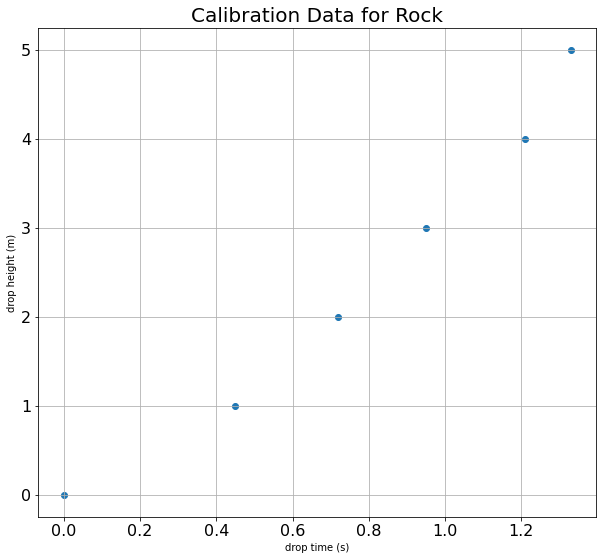

In [13]:

fig1, ax1 = plt.subplots()
ax1.scatter(timedata, heightdata)

# a more explicit way to set labels
plt.xlabel('drop time (s)', fontsize = 10)
plt.ylabel('drop height (m)', fontsize = 10)
plt.title('Calibration Data for Rock', fontsize = 20)

fig1.set_size_inches(10, 9)
ax1.grid()

#fig1.savefig("myplot.png")
plt.show()

***
## Lab Deliverable (II):

A plot of your raw data with your analysis of that data. Any data points seem out of place? Doesn't appear linear? If it curves does the shape match your conceptual understanding of the setting? Imagine you are presenting this data to your engineering group and you need them to understand why it seems reasonable or not.

***

### Curve Fitting

The new feature for this lab is fitting a polynomial curve to the data and trying to make sense of it.

```degree``` is the order of the polynomial as in degree = 2 => quadratic polynomial with 3 coefficients.

[polynomial.polynomial.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyfit.html)

Read the documentation and see if you can figure out what is happening in this code block.

In [9]:
degree = 3
coefs = ply.polyfit(timedata, heightdata,degree)
print("Coefficients of polynomial fit:", coefs)

Coefficients of polynomial fit: [-0.0111631   1.87386972  1.00256291  0.26917256]


### Add the physics model...the curve fit and the ideal rock

The model we will create here is not a linear model but it starts the same way by generating a set of 'x' values from which to generate the 'y' values give the curve fit generated above.

It starts by defining a set of x values.```numpy.linspace()``` is a tool for doing this and because we did ```import numpy as np``` it shows in the code as ```np.linspace()```. Look back to previous labs if you need to refresh.

[numpy.linspace documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) 

Because it's interesting to see and not hard to do when you have access to a notebook I've included the model of an ideal rock. You can worry if you want about whether gravity in Bend is different than sea level (it is a little) but the relationship of your data, the curve fit, and the ideal rock should make sense.


In [10]:
# generate x values for model of data
maxtime = 2.0
numpoints = 20
modeltime = np.linspace(0.,maxtime,numpoints)

# create a model height list that matches the model time
modelheight = np.full_like(modeltime,0)
idealrock = np.full_like(modeltime,0)

# calculate the heights predicted from the model
modelheight = coefs[0] + coefs[1]*modeltime + \
        coefs[2]* modeltime**2 + coefs[3]*modeltime**3

# calculate an ideal physics rock (no air drag and a = 9.81 m/s/s)
idealrock = 0.5*9.81*modeltime**2

# print("testing the output of the loop;", modelheight)

***
## Lab Deliverable (II):

The cell below illustrates how to generate the plot of your data, the behavior of an ideal physics rock, the polynomial fit to your data, and the drop time for your unknown height. Describe the important features of this plot and use markdown to show the polynomial fit with the coefficients. 

Compare each coefficient with those in the standard kinematic expression for the position of an object experiencing constant acceleration.

.$$\large x_f = x_0 + v_{x_0} t + \frac{1}{2} a_x t^2$$

The coefficients of your polynomial fit have the same meaning as the terms above. 

***

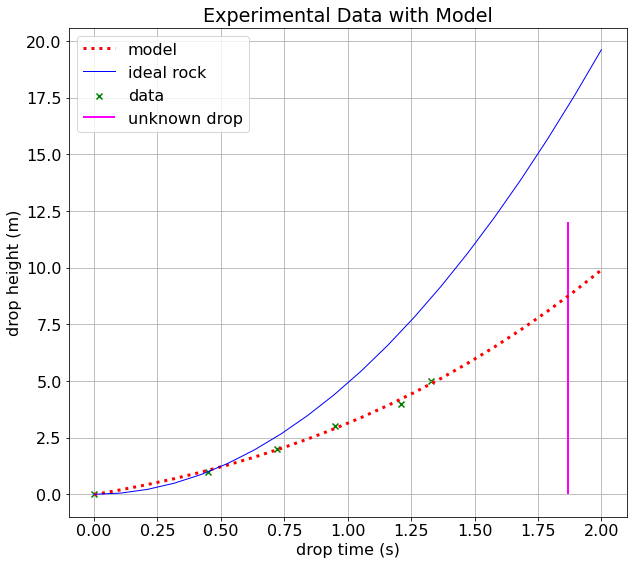

In [11]:
fig2, ax2 = plt.subplots()

# This is the plot of the actual data
ax2.scatter(timedata, heightdata,
            marker = 'x', color = 'green',
            label = "data")

# This is the plot of your polynomial curve fit
ax2.plot(modeltime, modelheight,
         color = 'red', linestyle = ':',
         linewidth = 3., label = "model")

# This is the plot of an ideal physics rock
ax2.plot(modeltime, idealrock,
         color = 'blue', linestyle = '-',
         linewidth = 1., label = "ideal rock")

# This is the drop time you measured for your unknown height
# followed by a plot of a vertical line 'vlines' at that point
# You MAY need to change the 12 to a different number. See what 
# happens when you do.
unknown_data = 1.87
ax2.vlines(unknown_data, 0, 12,
         color = 'magenta', linestyle = '-',
         linewidth = 2., label = "unknown drop")


# a more explicit way to set labels
plt.xlabel('drop time (s)', fontsize = 10)
plt.ylabel('drop height (m)', fontsize = 10)
plt.title('Experimental Data with Model', fontsize = 20)

fig2.set_size_inches(10, 9)
ax2.grid()

plt.legend(loc= 2)
plt.show()

### Terminal Velocity? (Deliverable III)

Does this data and the model suggest that your 'rock' has reached terminal velocity during this experiment? Why or why not? What would that terminal velocity be? 

### Lab Deliverable (IV): Challenge Drop

Begin by documenting what you measured for your 'challenge drop'. Where is it located and what were the conditions under which you made the measurement? Hopefully you were able to make multiple measurements to benefit from the effects of averaging.

Present your measured drop time for the unknown height. From this data point and your model above predict the height of the unknown object and a numerical value for your uncertainty based on your data. I drew a line on the previous plot indicating the drop time for the unknown which you can of course edit. The intersection point on the plot should be consistent with the predicted height found below by plugging your drop time for the unknown height into the polynomial fit.

In [51]:
predicted_height = coefs[0] + coefs[1]*unknown_data + \
        coefs[2]* unknown_data**2 + coefs[3]*unknown_data**3

print("The predicted height of unknown drop is (m):", predicted_height)

The predicted height of unknown drop is (m): 10.29424274746809


### Discussion: Deliverable IV

Is there a way to check this result for reasonableness? Does it make sense from an examination of the environment? I'm interested in how you do a 'gut check' of your answer rather than just take what the code spits out. Do you feel any better looking at the plot rather than the output of the calculation?

## Reflection

As usual I learned a bunch of new stuff in the process of creating this notebook as a framework for your lab report. 

The issue of embedding images in the notebook in such a way that they show in the pdf continues to be an aggravation. I will keep working on this.

Thanks.

### Extensions

Extensions are ideas that I didn't have time to explore or develop fully for this lab. These are offered as opportunities for students with more programming experience than is typical for students in the class.


#### Second Plot that is zoomed in to the point of intersection

I could just create another plot with the same functions but different axis limits but I wonder if there is a more clever way to do this.
